# Parkinson's Disease Prediction

## Using Support Vector machine

### Importing all the required libraries

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

### Data Collection and Processing


In [28]:
dataframe=pd.read_csv('./parkinsons.data')
dataframe.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [29]:
dataframe.shape

(195, 24)

In [30]:
dataframe.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [31]:
dataframe['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [32]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [33]:
dataframe=dataframe.drop(columns=['name'])

In [34]:
dataframe.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

## Splitting Features and Labels

In [35]:
X=dataframe.drop(columns=['status'],axis=1)

Y=dataframe['status']


In [36]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [37]:
Y.value_counts()

status
1    147
0     48
Name: count, dtype: int64

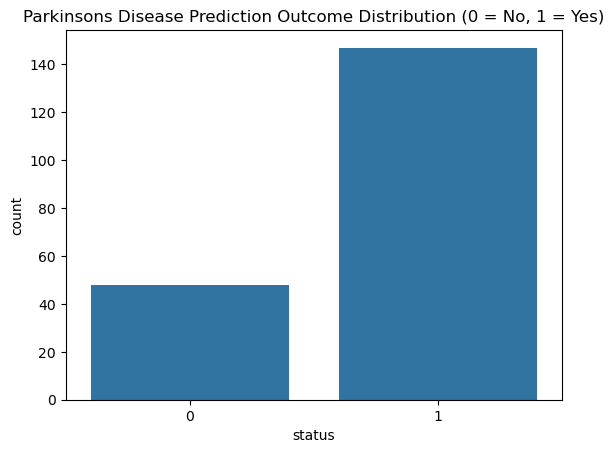

In [38]:
sns.countplot(x='status', data=dataframe)
plt.title("Parkinsons Disease Prediction Outcome Distribution (0 = No, 1 = Yes)")
plt.show()

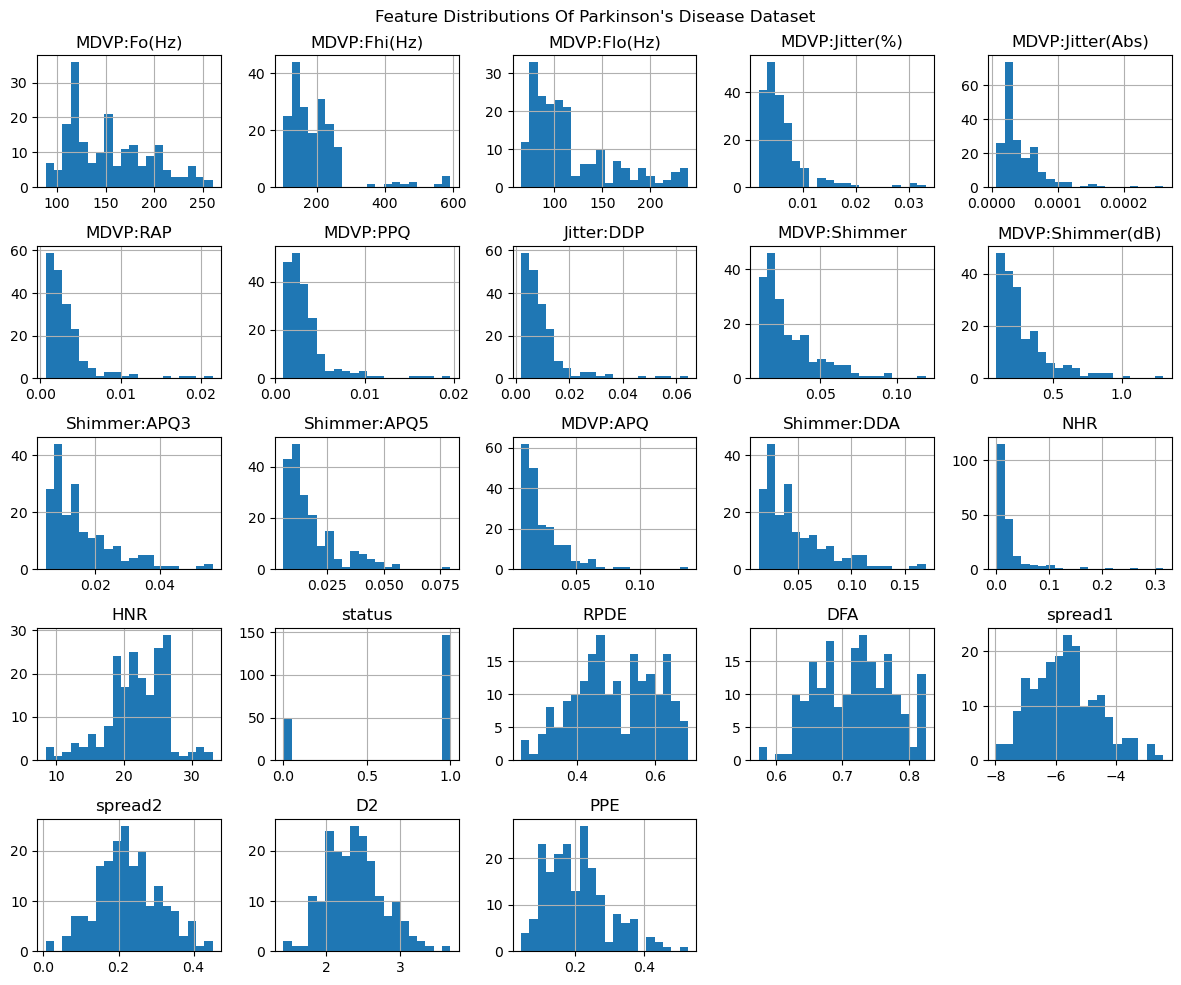

In [39]:
dataframe.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions Of Parkinson's Disease Dataset")
plt.tight_layout()
plt.show()


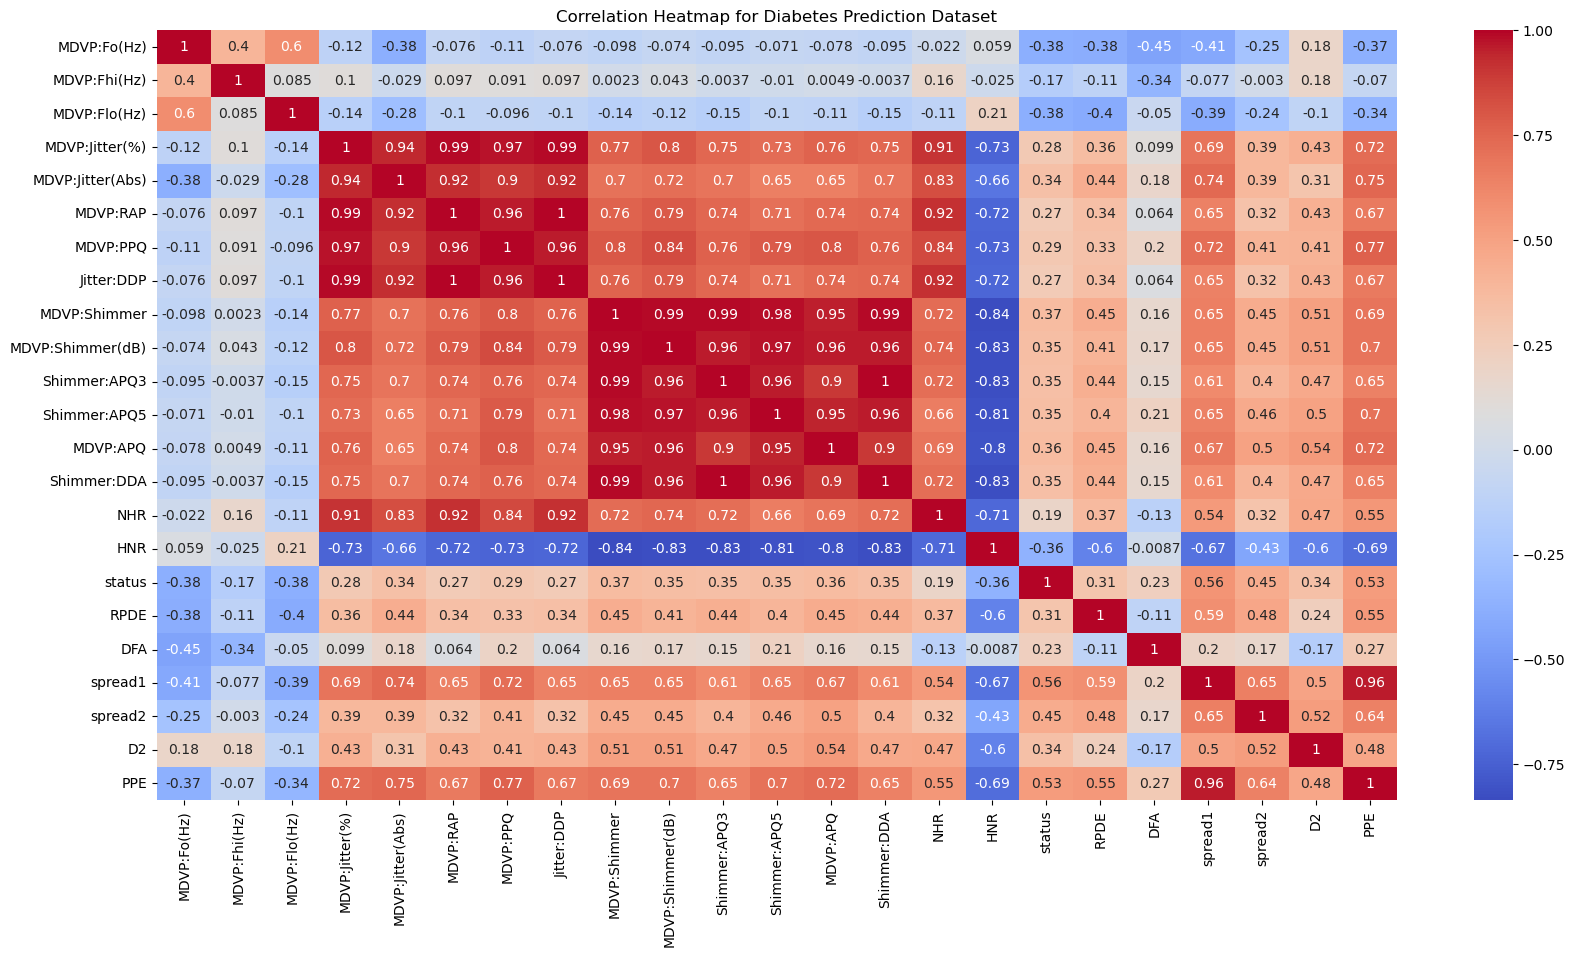

In [40]:
plt.figure(figsize=(20, 10))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Diabetes Prediction Dataset")
plt.show()

## Standardize The Data

In [41]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [42]:
print(X)


[[-0.82929965 -0.43616456 -0.95203729 ...  0.48047686 -0.21053082
   0.86888575]
 [-0.77097169 -0.53097409 -0.05772056 ...  1.31118546  0.27507712
   1.80360503]
 [-0.90947638 -0.7231683  -0.10987483 ...  1.01768236 -0.10362861
   1.40266141]
 ...
 [ 0.49557839  0.47010361 -0.96839309 ... -0.81807931  0.78033848
  -0.83241014]
 [ 1.07876114  2.19004398 -0.95417967 ... -0.22906571 -0.63700298
  -0.92610456]
 [ 1.45481664  0.69224632 -0.88348115 ... -0.43085284  0.45480231
  -0.64505466]]


## Splitting the data into Train and Test data 

In [43]:
X_train ,X_test ,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)


In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [46]:
print("After SMOTE class distribution:", Counter(Y_train))

After SMOTE class distribution: Counter({1: 118, 0: 118})


In [47]:
print(X.shape,X_train.shape,X_test.shape)

print(Y.shape,Y_train.shape,Y_test.shape)

(195, 22) (236, 22) (39, 22)
(195,) (236,) (39,)


## Model Training

In [48]:
model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    },
    'logistic_reg': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear']
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7]
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {}  # No hyperparameters for basic GaussianNB
    }
}

# Store results
best_models = []
#key value pair 
for name, mp in model_params.items():
    #  use for training cv=> cross validation choose on the bses of accuracy 
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    # fitiing the data on current model
    clf.fit(X_train, Y_train)

    best_models.append({
        'model': name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'final_model': clf.best_estimator_
    })
    print(f"{name} best CV accuracy: {clf.best_score_:.4f}")
    print(f"Best params: {clf.best_params_}\n")


decision_tree best CV accuracy: 0.9152
Best params: {'criterion': 'gini', 'max_depth': None}

logistic_reg best CV accuracy: 0.8644
Best params: {'C': 10, 'solver': 'liblinear'}

knn best CV accuracy: 0.9280
Best params: {'n_neighbors': 3}

naive_bayes best CV accuracy: 0.7669
Best params: {}



In [49]:
best_model_info = max(best_models, key=lambda x: x['best_score'])
final_model = best_model_info['final_model']
print(f"The best model has a score of {best_model_info['best_score']} and is {final_model}.")
best_model_info

The best model has a score of 0.9280141843971631 and is KNeighborsClassifier(n_neighbors=3).


{'model': 'knn',
 'best_score': 0.9280141843971631,
 'best_params': {'n_neighbors': 3},
 'final_model': KNeighborsClassifier(n_neighbors=3)}

## EVALUATING  

### FINDING ACCURACY SCORE OF TRAINED DATA 

In [50]:
X_train_prediction =final_model.predict(X_train)

## compare with original

prediction1 =accuracy_score(X_train_prediction,Y_train)

print("Accuracy Score of Trained data : ",prediction1)


Accuracy Score of Trained data :  0.961864406779661


In [51]:
X_test_predict=final_model.predict(X_test)

## comapre with original 

prediction2=accuracy_score(X_test_predict,Y_test)

print("Accuracy Score of Tested data : ",prediction2)


Accuracy Score of Tested data :  0.9230769230769231


In [52]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(X_test_predict,Y_test)
print('Confusion matrix : \n',cm)


cr=classification_report(X_test_predict,Y_test)
print('Classification Report  :\n ',cr)

Confusion matrix : 
 [[ 9  2]
 [ 1 27]]
Classification Report  :
                precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.93      0.96      0.95        28

    accuracy                           0.92        39
   macro avg       0.92      0.89      0.90        39
weighted avg       0.92      0.92      0.92        39



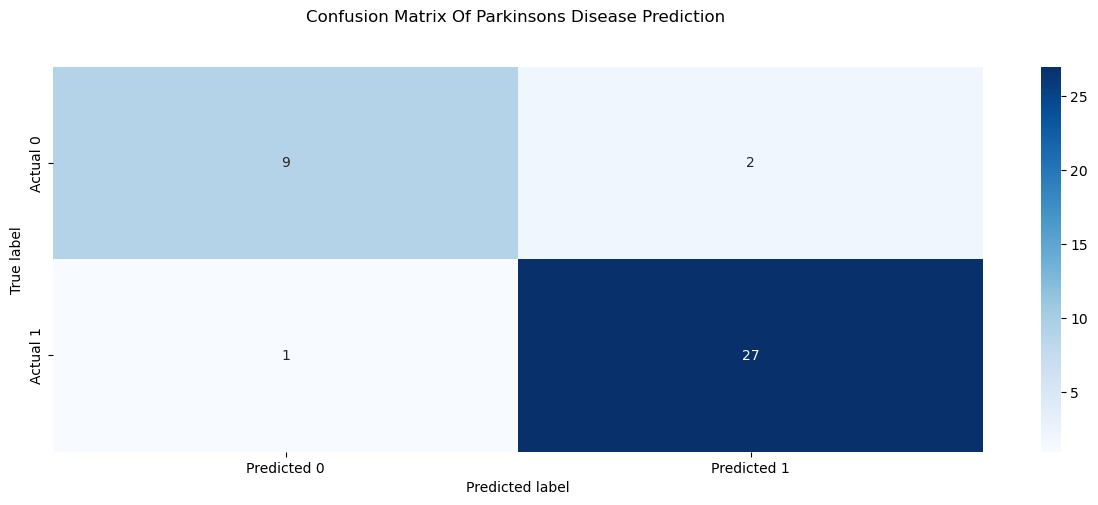

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import gridspec

# Create figure
plt.figure(figsize=(15, 5))
# Confusion Matrix
data_cm = cm
sns.heatmap(data_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Of Parkinsons Disease Prediction \n', pad=20)
plt.xlabel('Predicted label')
plt.ylabel('True label')


plt.show()

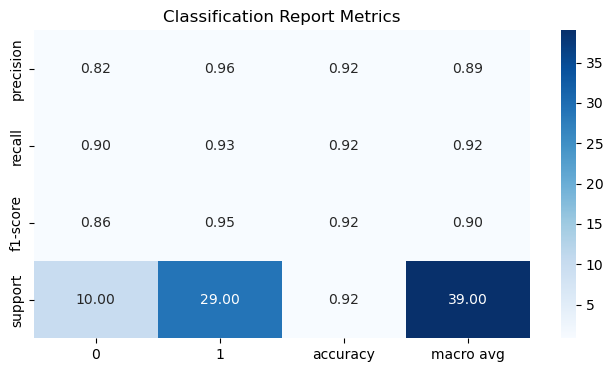

In [54]:

# Generate classification report
report = classification_report(Y_test, X_test_predict, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification report
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Metrics')
plt.show()




# Building predictive system 

## Take any random input 

In [55]:

## status = 1
input_data=(119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)

## status = 0
# input_data=(199.22800,209.51200,192.09100,0.00241,0.00001,0.00134,0.00138,0.00402,0.01015,0.08900,0.00504,0.00641,0.00762,0.01513,0.00167,30.94000,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501)

arr=np.asarray(input_data)

arr_reshaped=arr.reshape(1,-1)

print(arr_reshaped)

[[ 1.199920e+02  1.573020e+02  7.499700e+01  7.840000e-03  7.000000e-05
   3.700000e-03  5.540000e-03  1.109000e-02  4.374000e-02  4.260000e-01
   2.182000e-02  3.130000e-02  2.971000e-02  6.545000e-02  2.211000e-02
   2.103300e+01  4.147830e-01  8.152850e-01 -4.813031e+00  2.664820e-01
   2.301442e+00  2.846540e-01]]


In [56]:
std_arr=scaler.transform(arr_reshaped)

## Predict outcome for input data

In [57]:
prediction3=final_model.predict(std_arr)


if(prediction3[0]==1):
    print("Person has parkinson's disease .")
else:
    print("Person does not have parkinson's disease .")    

Person does not have parkinson's disease .


In [58]:
import pickle

In [59]:
filename='parkinsons_model.sav'
pickle.dump(final_model,open(filename,'wb'))
pickle.dump(scaler,open('scaler4.sav','wb'))

In [60]:
# Loading the saved model
loaded_model=pickle.load(open(filename,'rb'))
loaded_model1=pickle.load(open('scaler4.sav','rb'))